In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [45]:
metaDS = pd.read_csv("C:/Users/marci/Desktop/Projeto mestrado/Datasets/Batch 06.04/Treinamento WEKA ajustado/0604MLP.csv")
metaDSnp = metaDS.to_numpy()

In [ ]:
'''
ABv = metaDS.drop(columns=['C','D','AREA','AREA_FORMULA','VOL_FORMULA','ECLODIU']) 
ABa = metaDS.drop(columns=['C','D','VOLUME','AREA_FORMULA','VOL_FORMULA','ECLODIU']) 

ABaf = metaDS.drop(columns=['C','D','AREA','VOLUME','VOL_FORMULA','ECLODIU']) 
ABvf = metaDS.drop(columns=['C','D','AREA','VOLUME','AREA_FORMULA','ECLODIU'])

afvfA = metaDS.drop(columns=['B','C','D','AREA','VOLUME','ECLODIU']) 
afvfB = metaDS.drop(columns=['A','C','D','AREA','VOLUME','ECLODIU']) 

vaA = metaDS.drop(columns=['B','C','D','AREA_FORMULA','VOL_FORMULA','ECLODIU']) 
vaB = metaDS.drop(columns=['A','C','D','AREA_FORMULA','VOL_FORMULA','ECLODIU']) 
'''

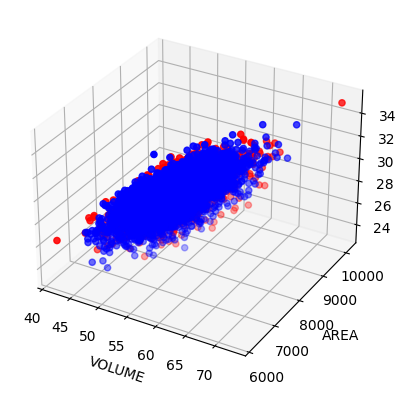

In [57]:
'''
    Coluna 0 - A
    Coluna 1 - B
    Coluna 2 - C
    Coluna 3 - D
    Coluna 4 - VOLUME
    Coluna 5 - AREA
    Coluna 6 - AREA FORMULA
    Coluna 7 - VOLUME FORMULA
    Coluna 8 - ECLODIU
'''

col1 = 4
col2 = 5
col3 = 3
col4 = 8

x = metaDSnp[:, col1]  # Primeira coluna
y = metaDSnp[:, col2]  # Segunda coluna
z = metaDSnp[:, col3]  # Terceira coluna
classe = metaDSnp[:, col4] # Coluna de classificação

# Criação do gráfico tridimensional
figure = plt.figure()
graph = figure.add_subplot(111, projection='3d')

graph.scatter(x[classe == 0], y[classe == 0], z[classe == 0], c='red', label='Não eclodiu')
graph.scatter(x[classe == 1], y[classe == 1], z[classe == 1], c='blue', label='Eclodiu')

# Adicionar rótulos
graph.set_xlabel(metaDS.columns[col1])
graph.set_ylabel(metaDS.columns[col2])
graph.set_zlabel(metaDS.columns[col3])

# Mostrar o gráfico
plt.show()